# First model

In [1]:
from keras.models import load_model
model = load_model('../saved_models/01052019-092342-e1.h5')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [2]:
import pandas as pd
import numpy as np
import os

def timeDelay(df, delay):
    X_data, y_data = [], []
    
    for i in range(delay, len(df)):
        X_data.append(df[i-delay: i].tolist())
    X_data = np.array(X_data)
    y_data = df[delay:]
    return np.reshape(X_data, (X_data.shape[0], X_data.shape[1], 1)),\
           np.reshape(y_data, (len(y_data), ))

def split(X, y, ratio):    
    test_split = int(len(X) * ratio)
    
    X_train, y_train = X[:test_split], y[:test_split]
    X_test, y_test = X[test_split:], y[test_split:]
    return X_train, y_train, X_test, y_test

# train-test split on processed dataset
PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
PROCESSED_PATH = 'data/processed'

df = pd.read_csv(os.path.join(PROJ_ROOT, PROCESSED_PATH, 'single_device_activation.csv'),
                header=0, sep=',')

X, y = timeDelay(df.Active.values, delay=5)
X_train, y_train, X_test, y_test = split(X, y, ratio=0.8)

In [3]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [4]:
import math

trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.01 MSE (0.08 RMSE)
Test Score: 0.00 MSE (0.00 RMSE)


# Visualizing scores

In [16]:
import matplotlib.pyplot as plt

def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white', figsize=(12,7)) 
    ax = fig.add_subplot(111)
    ax.plot(true_data, 'b-', label='True Data')
    plt.plot(predicted_data, 'r^', label='Prediction')
    plt.legend()
plt.show()

In [6]:
y_test

array([0., 0., 0., ..., 0., 0., 1.])

In [7]:
unique, counts = np.unique(y_test, return_counts=True)

np.asarray((unique, counts)).T

array([[0.000000e+00, 5.824563e+06],
       [1.000000e+00, 2.100000e+01]])

In [8]:
y_test_pred = np.reshape(y_test_pred, (y_test_pred.size,))
y_test_pred

array([2.8398631e-06, 2.8398631e-06, 2.8398631e-06, ..., 2.8398631e-06,
       2.8398633e-06, 2.8398633e-06], dtype=float32)

In [9]:
unique, counts = np.unique(y_test_pred, return_counts=True)

np.asarray((unique, counts)).T

array([[2.83986310e-06, 5.46045200e+06],
       [2.83986333e-06, 3.64032000e+05],
       [5.11100006e-06, 2.00000000e+01],
       [5.55253200e-06, 3.00000000e+00],
       [5.55253246e-06, 1.70000000e+01],
       [6.64733943e-06, 1.70000000e+01],
       [6.64734080e-06, 3.00000000e+00],
       [8.57259147e-06, 2.00000000e+01],
       [9.02727152e-06, 2.00000000e+01]])

Interpreting LSTM output:

In [10]:
y_test_pred[y_test_pred==2.83986310e-06]=0
y_test_pred[y_test_pred==2.83986333e-06]=0
y_test_pred[y_test_pred!=0]=1
y_test_pred

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

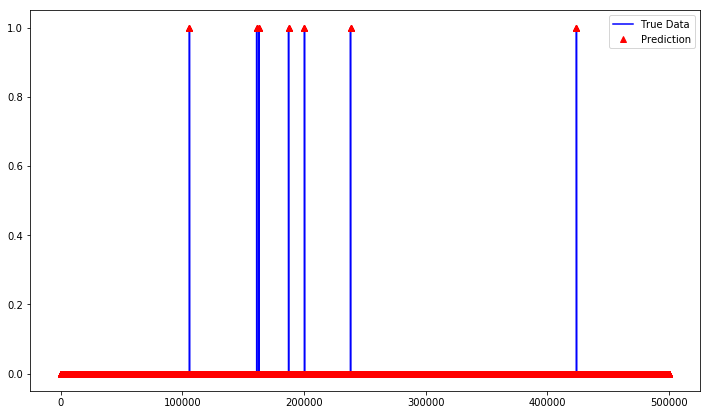

In [17]:
plot_results(y_test_pred[200000:700000, ], y_test[200000:700000, ])

# Second model

In [1]:
from keras.models import load_model
model = load_model('../saved_models/27052019-094040-e10.h5')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [ ]:
import pandas as pd
import numpy as np
import os

def timeDelay(df, delay):
    X_data, y_data = [], []
    
    for i in range(delay, len(df)):
        X_data.append(df[i-delay: i].tolist())
    X_data = np.array(X_data)
    y_data = df[delay:]
    return np.reshape(X_data, (X_data.shape[0], X_data.shape[1], 1)),\
           np.reshape(y_data, (len(y_data), ))

def split(X, y, ratio):    
    test_split = int(len(X) * ratio)
    
    X_train, y_train = X[:test_split], y[:test_split]
    X_test, y_test = X[test_split:], y[test_split:]
    return X_train, y_train, X_test, y_test

# train-test split on processed dataset
PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
PROCESSED_PATH = 'data/processed'

df = pd.read_csv(os.path.join(PROJ_ROOT, PROCESSED_PATH, 'single_device_activation.csv'),
                header=0, sep=',')

X, y = timeDelay(df.Active.values, delay=100)
X_train, y_train, X_test, y_test = split(X, y, ratio=0.8)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt

def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white', figsize=(12,7)) 
    ax = fig.add_subplot(111)
    ax.plot(true_data, 'b-', label='True Data')
    plt.plot(predicted_data, 'r^', label='Prediction')
    plt.legend()
plt.show()